##  Install and Import Dependencies

In [2]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

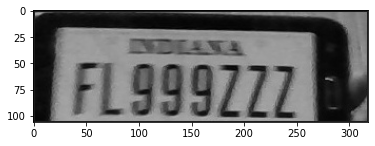

In [3]:
img = cv2.imread('image0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

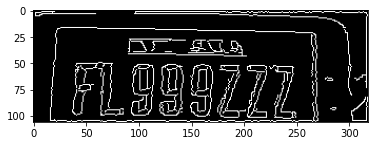

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[ 22,  19]],

       [[ 16, 104]],

       [[270, 104]],

       [[265,  21]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

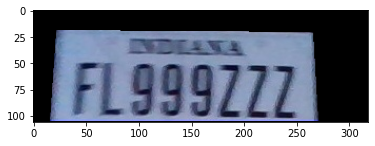

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

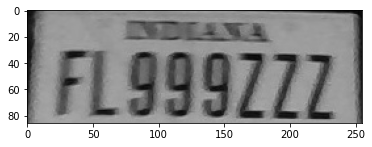

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[75, 5], [181, 5], [181, 25], [75, 25]], 'EEu', 0.03734913116110452),
 ([[13, 23], [245, 23], [245, 86], [13, 86]], 'FL999zzz', 0.3559100329666465)]

## 5. Render Result

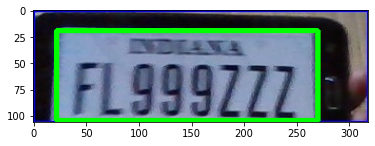

In [13]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [14]:
import csv
import uuid

In [15]:
'{}.jpg'.format(uuid.uuid1())

'9f3f0095-b8b8-11eb-84d0-d8d0905cdd61.jpg'

In [16]:
def save_results(text, cropped_image, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name),cropped_image)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [17]:
text

'EEu'

In [18]:
save_results(text,cropped_image,'detection_results.csv', 'Detection_Images')

# Real time detection

In [17]:
import cv2
import numpy as np

frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
minArea = 500

cap =cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,franeHeight)
cap.set(10,150)
count = 0

while True:
    success , img  = cap.read()

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)

    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            imgRoi = img[y:y+h,x:x+w]
            cv2.imshow("ROI",imgRoi)
    cv2.imshow("Result",img)
    if cv2.waitKey(1) & 0xFF ==ord('s'):
        cv2.imwrite("image"+str(count)+".jpg",imgRoi)
        cv2.rectangle(img,(0,200),(640,300),(0,255,0),cv2.FILLED)
        cv2.putText(img,"Scan Saved",(15,265),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)
        cv2.imshow("Result",img)
        cv2.waitKey(500)
        count+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



In [ ]:
import csv
import uuid  

In [ ]:
'{}.jpg'.format(uuid.uuid1())   

In [ ]:

    def save_results(text,img, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name),img)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])
        